## Phase Estimation

### 1.Initialize and set data

In [40]:
from funcs import *
from qiskit.circuit import ClassicalRegister
import math

In [41]:
n = 6        # qubits number
theta = math.pi/3 # parameter of rzgate, here we use Rz(theta) as U in phase estimation
# in this case, eigenvector is |1>, eigenvalue is e^(i*theta)

### 2.Map circuit

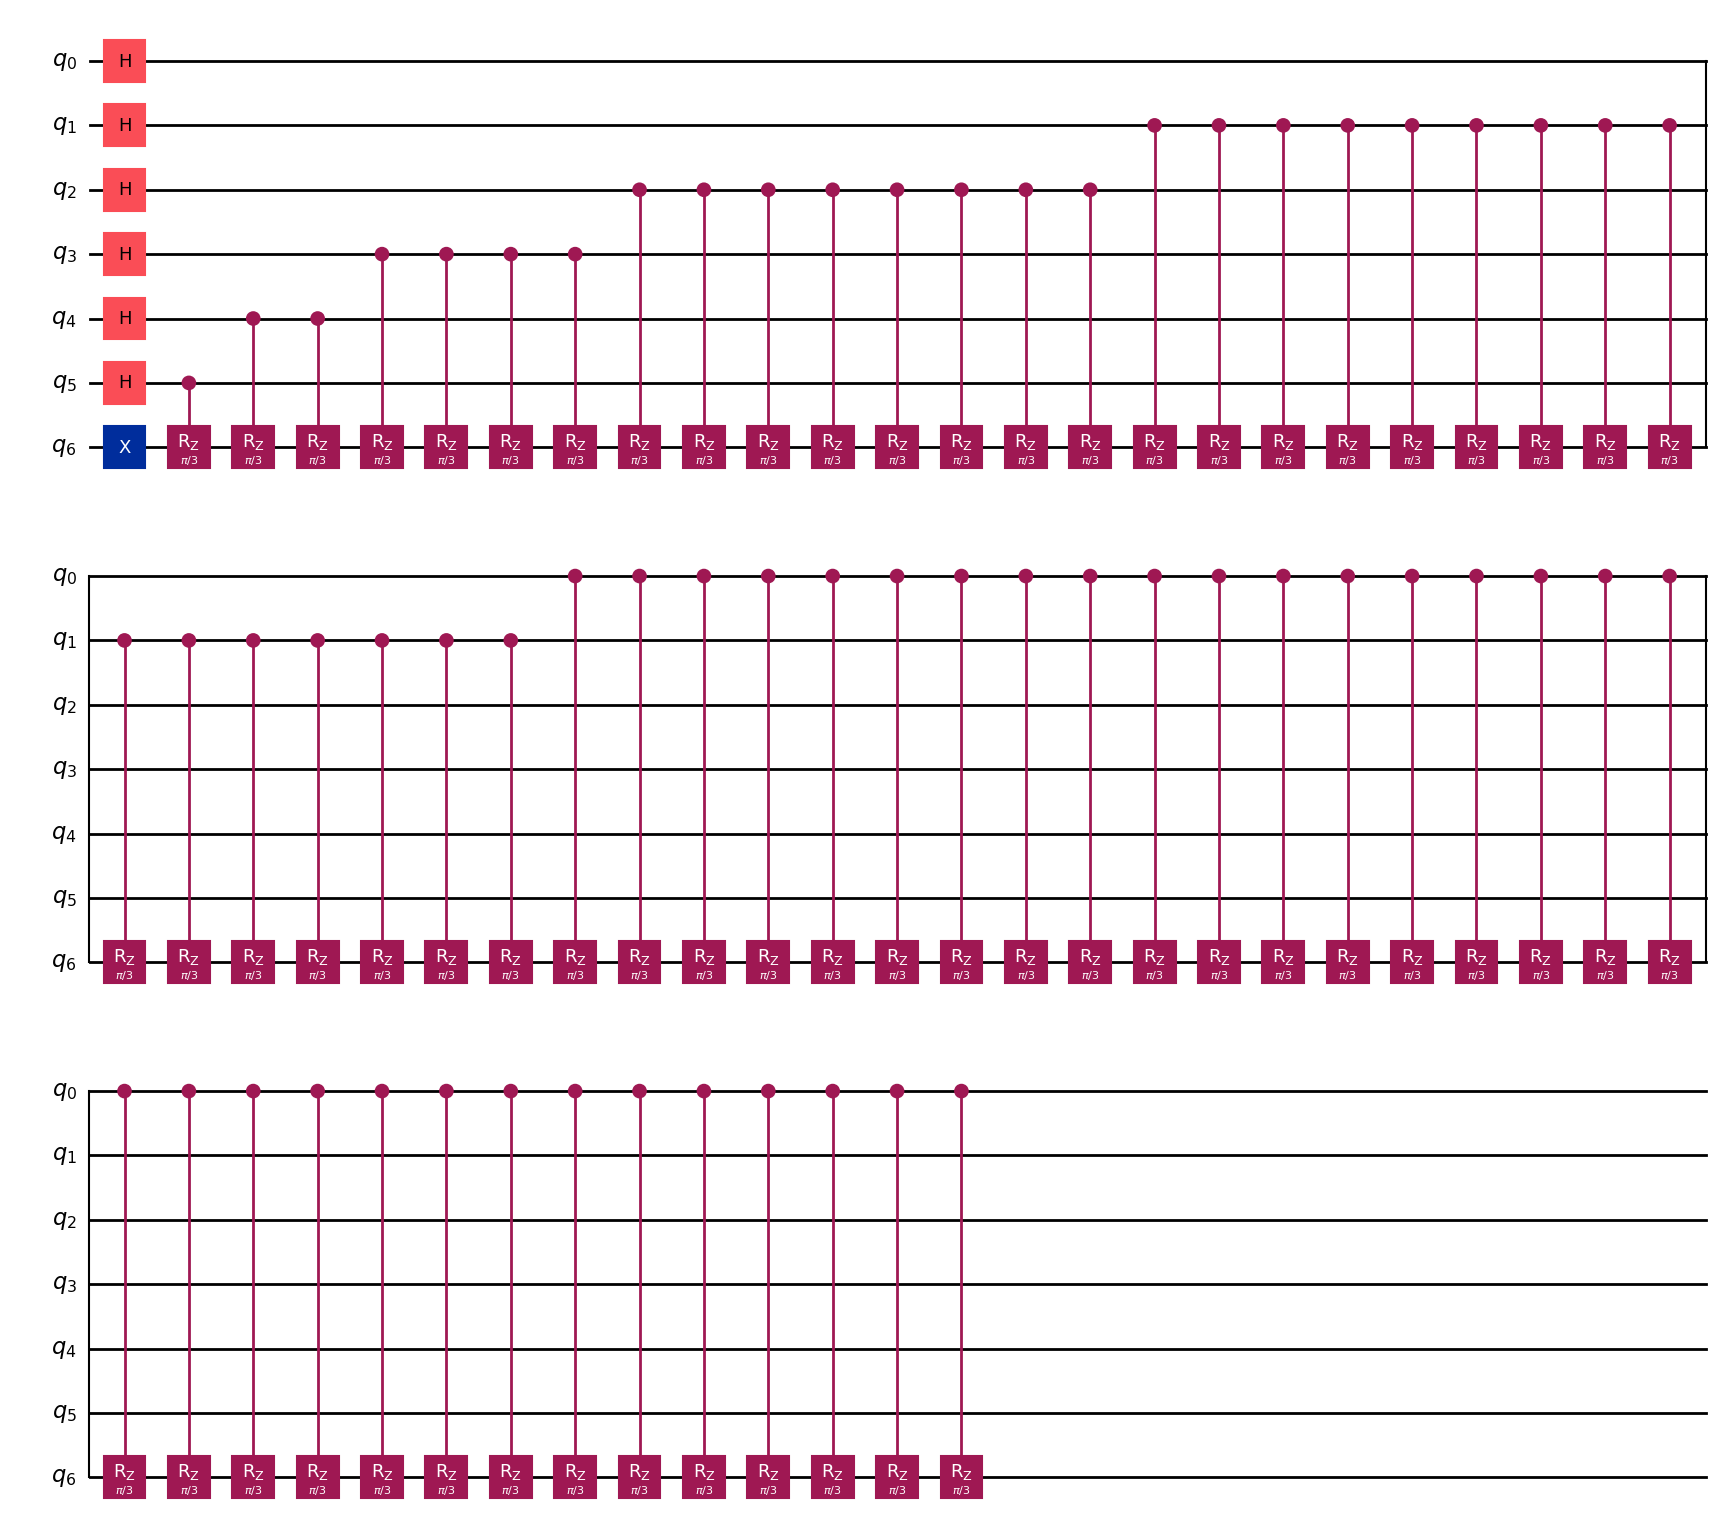

In [42]:
qc = QuantumCircuit(n+1)
qc.h(range(n))
qc.x(n)
for i in range(n):
    for j in range(2**i):
        qc.crz(theta, n-i-1, n)
qc.draw(output='mpl')

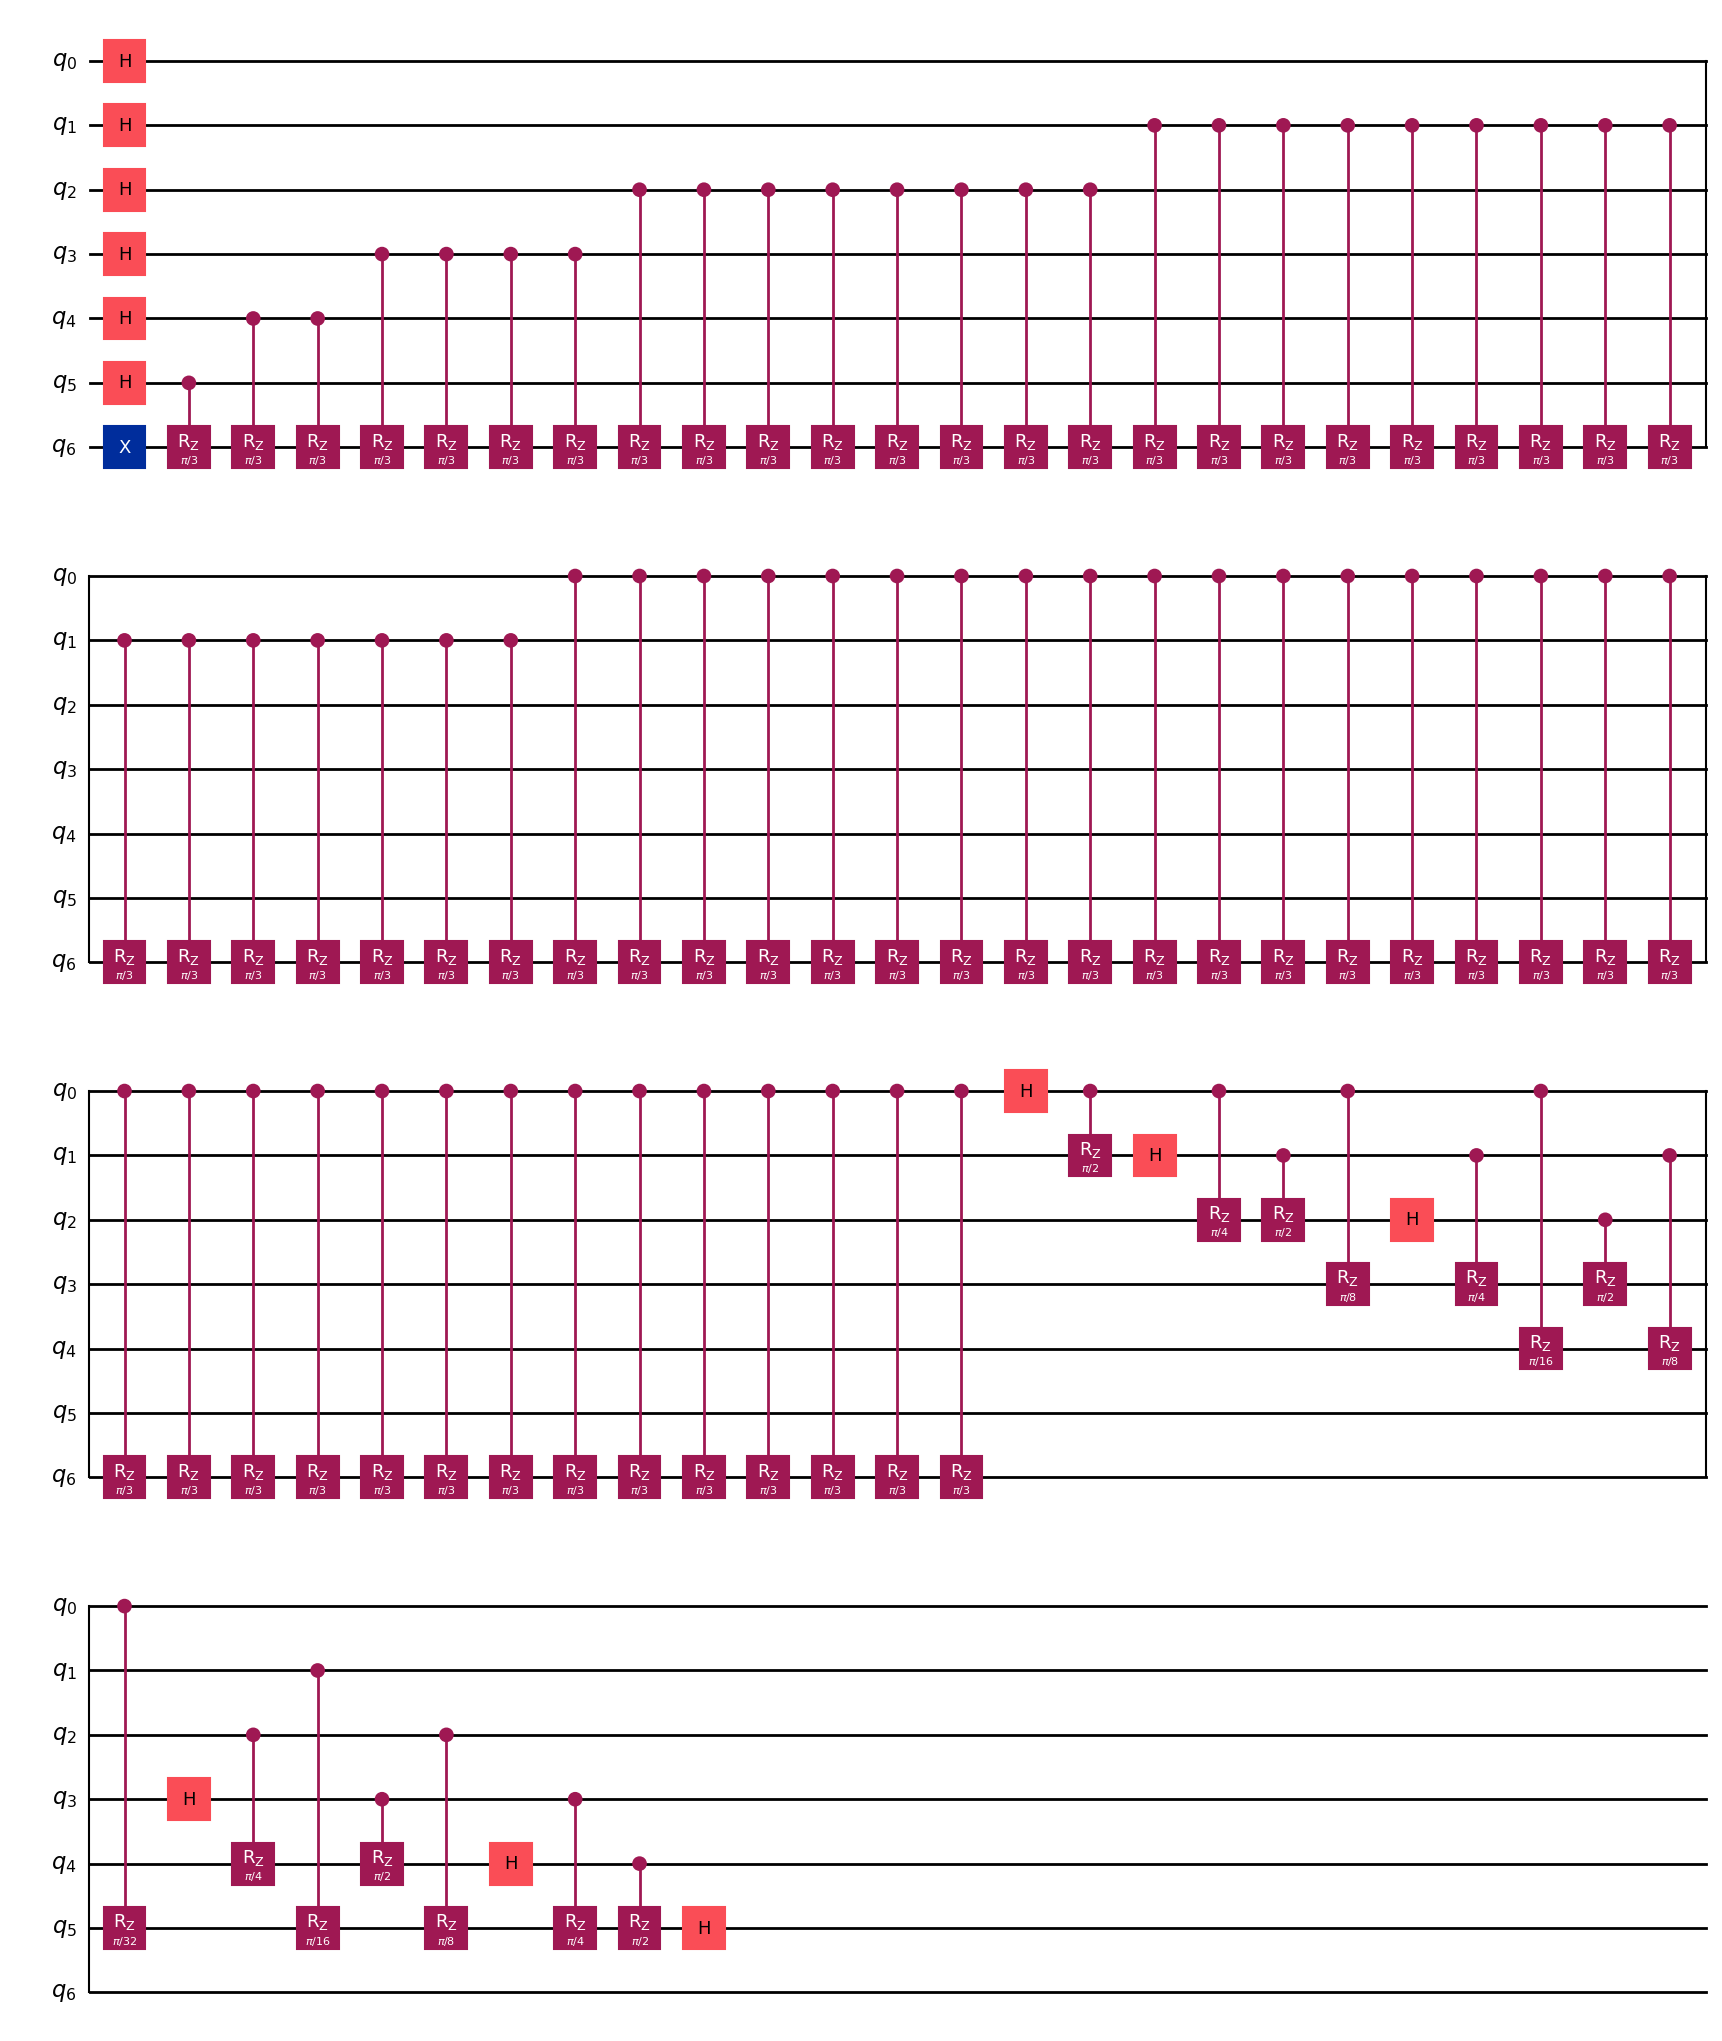

In [43]:
qc.h(0)
for i in range(1, n):
    for j in range(0, i):
        qc.crz(math.pi / (2 ** (i - j)), j, i)
    qc.h(i)
qc.draw(output='mpl')


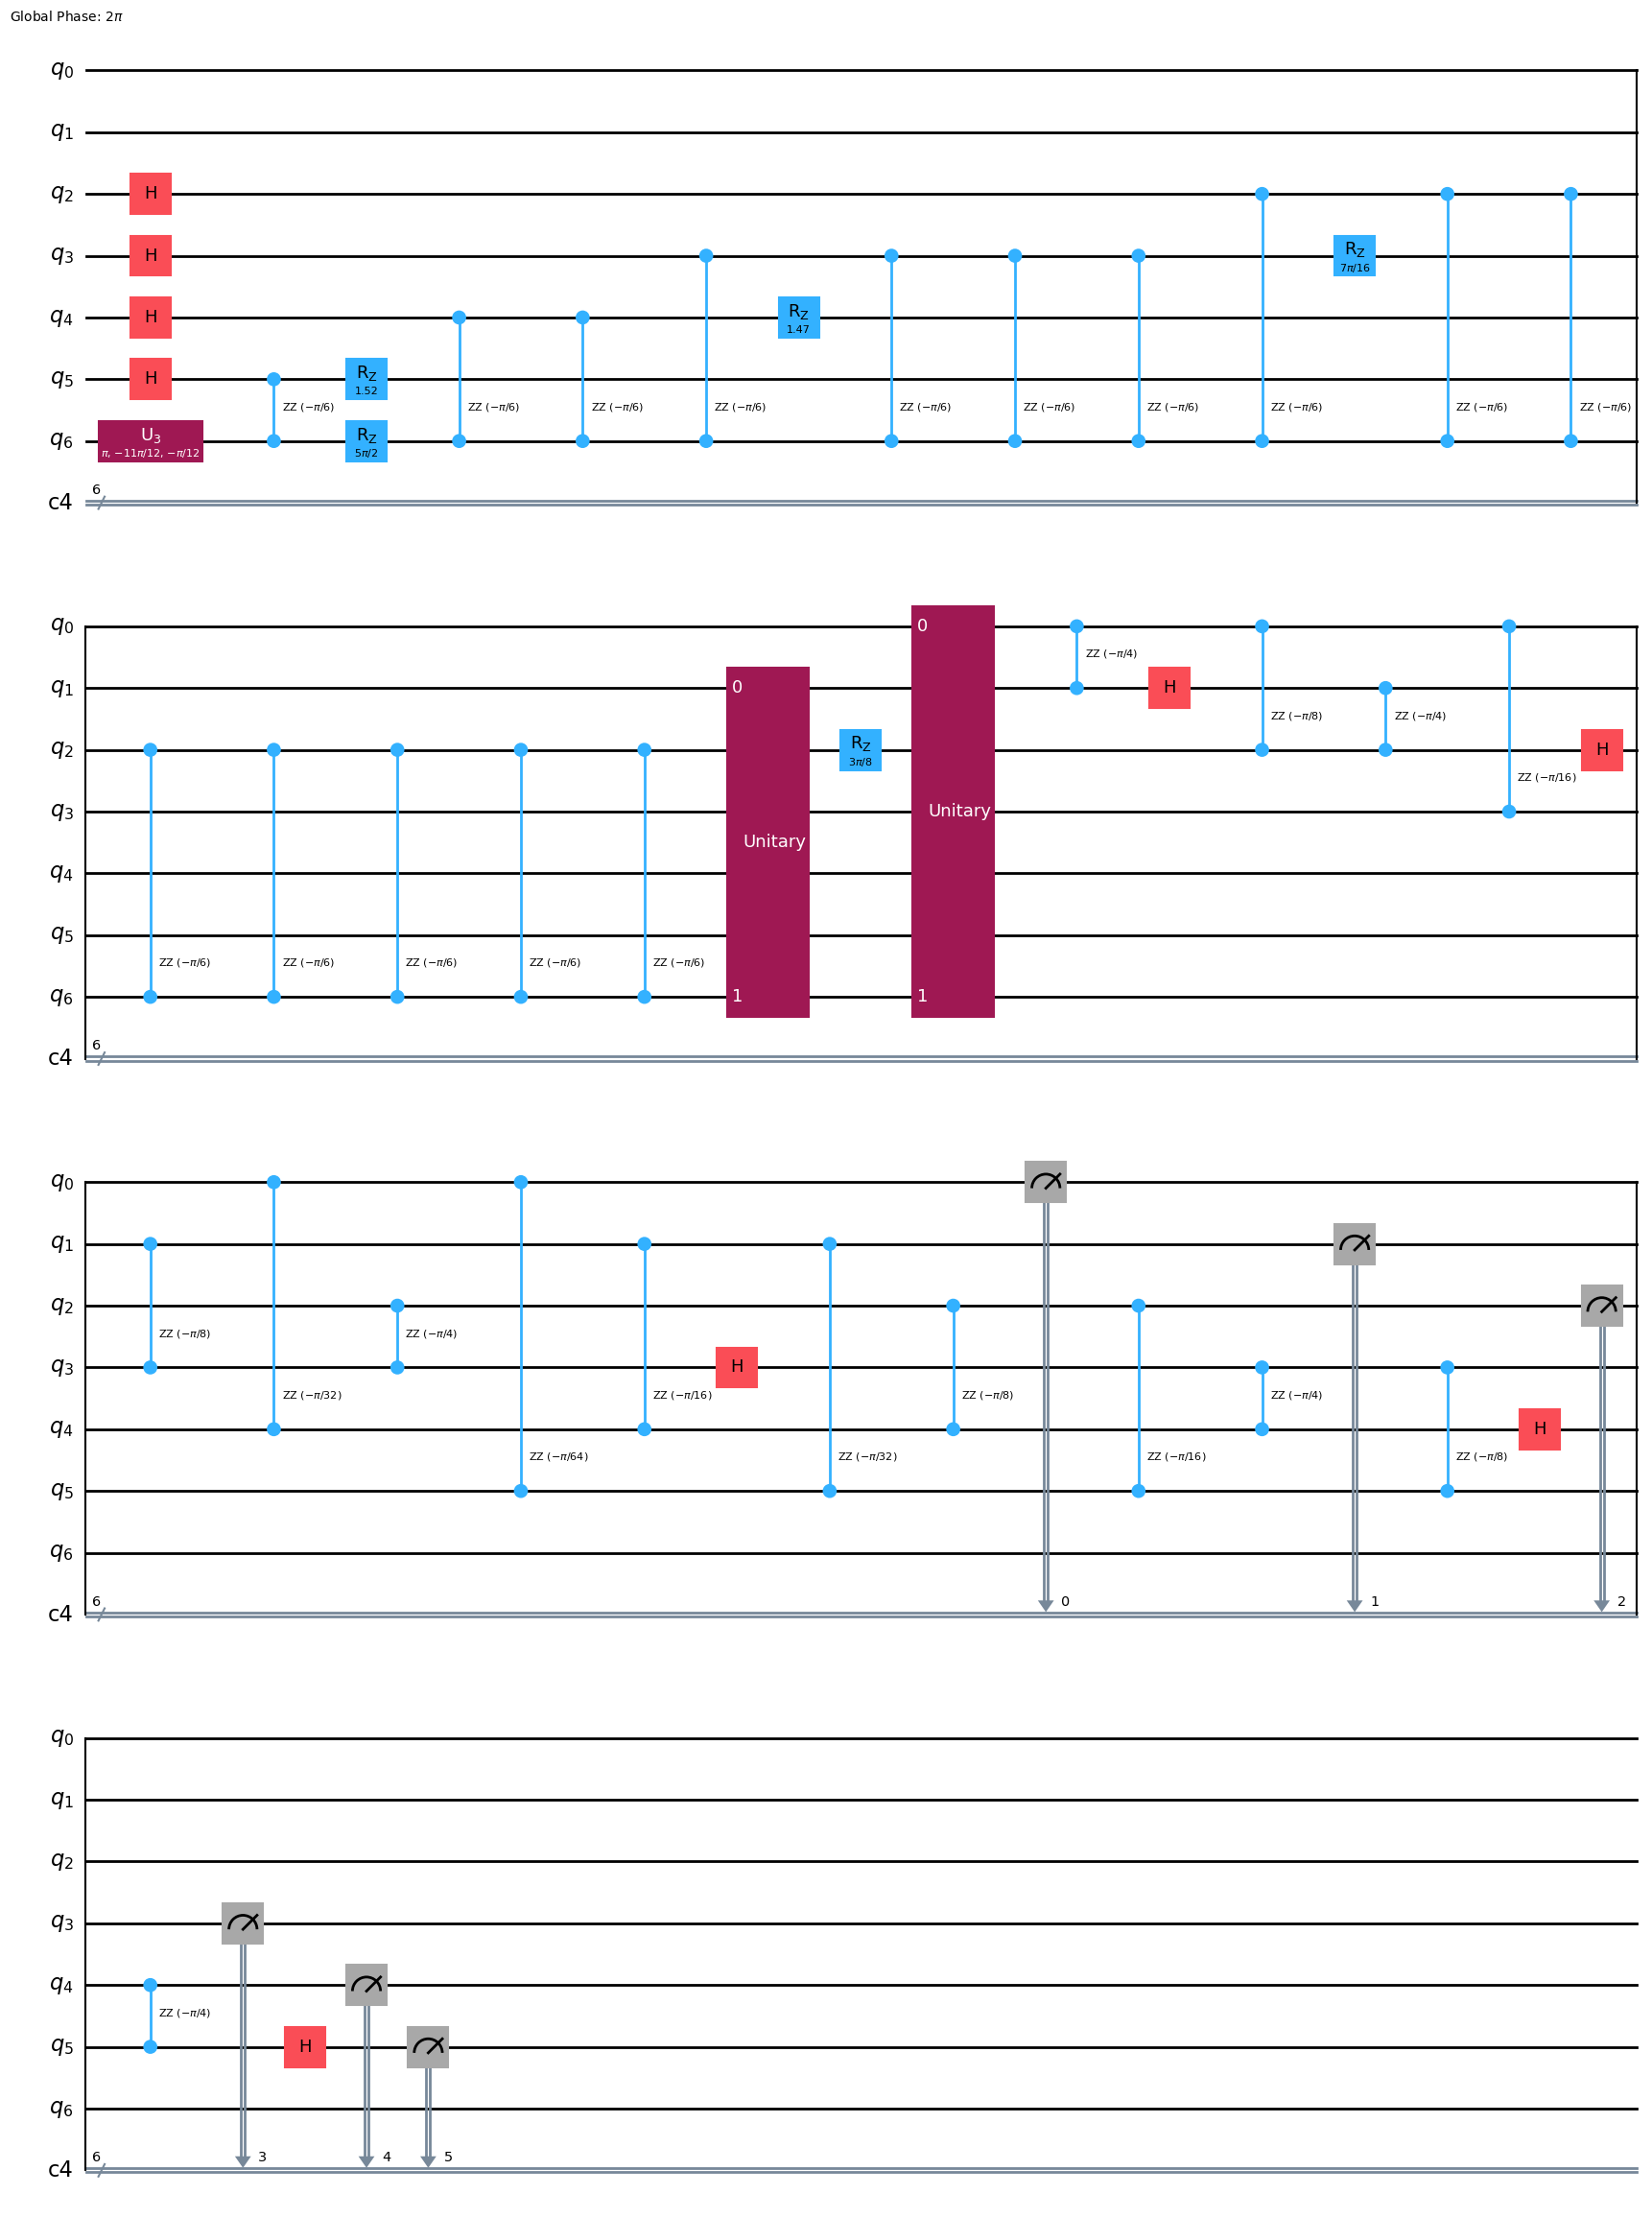

In [44]:
qc = transpile(qc, backend=AerSimulator(), optimization_level=3)
c = ClassicalRegister(n)
qc.add_register(c)
for i in range(n):
    qc.measure(i, c[i])
qc.draw(output='mpl')

### 3.execute and process the results

In [45]:
results = execute_qc(qc)
print(results)

# find the most likely result and convert it to a decimal
result = max(results, key=results.get) 
phi = 0.0
for i in range(len(result)):
    if result[i] == '1':
        phi += 2**(i - n)
print(phi)
print(1/3)

{'111011': 713, '111001': 29, '001111': 1, '111010': 182, '000100': 1, '101101': 1, '110011': 1, '111100': 29, '111000': 14, '111110': 7, '000000': 1, '110111': 3, '110110': 6, '000001': 4, '110101': 1, '111101': 10, '110001': 2, '000110': 1, '111111': 4, '110000': 1, '000111': 1, '101100': 1, '000011': 2, '110100': 3, '010010': 1, '010011': 1, '001000': 2, '110010': 1, '011010': 1}
0.859375
0.3333333333333333
